In [326]:
import pandas as pd
import numpy as np  
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as pl
from sklearn.ensemble import RandomForestRegressor


In [327]:
data = pd.read_csv(r'C:\Users\ayoya\Dropbox\housing - b.csv')
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [328]:
data.shape

(20640, 10)

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [330]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [331]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [332]:
data = data.dropna(subset=["total_bedrooms"])
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

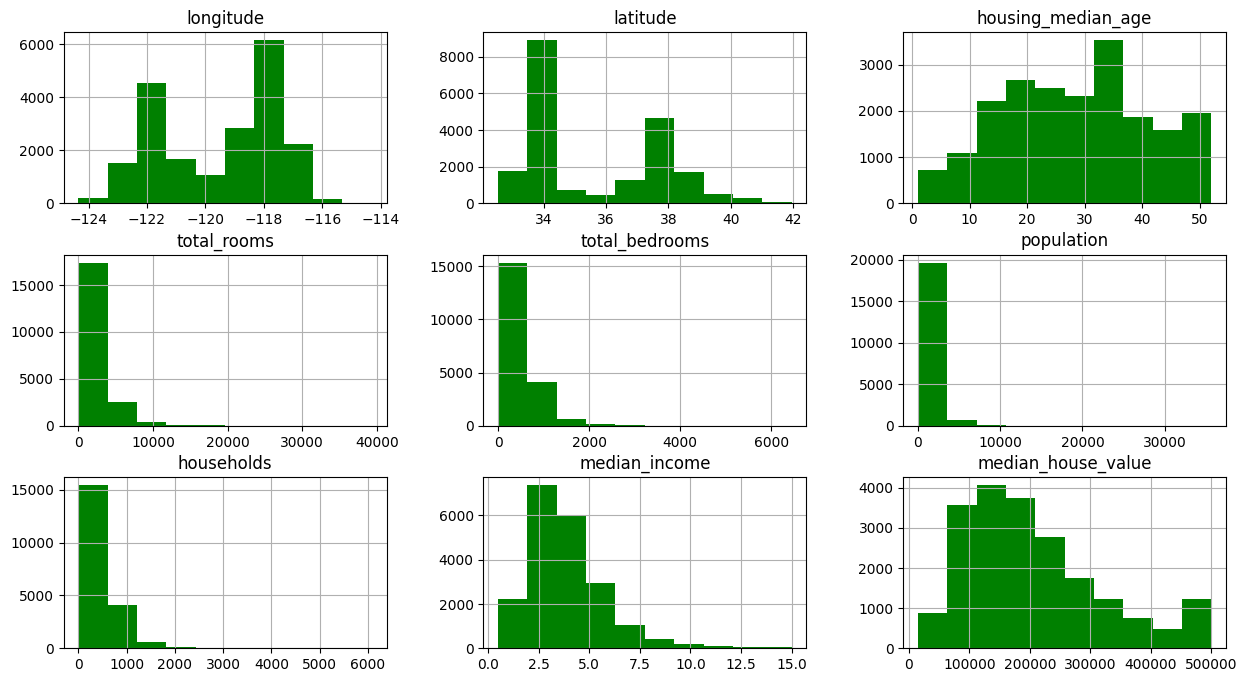

In [333]:
data.hist(figsize=(15, 8) , color = 'g')

In [334]:
data['total_rooms'] = np.log(data['total_rooms'] +1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

In [347]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,7.629543,6.054708,7.025121,5.984538,3.871162,0.442128,0.317917,0.000245,0.111095,0.128615
std,2.003578,2.136348,12.591805,0.750260,0.726728,0.736336,0.726856,1.899291,0.496652,0.465678,0.015641,0.314257,0.334782
min,-124.350000,32.540000,1.000000,1.098612,0.693147,1.386294,0.693147,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,7.280008,5.693732,6.669498,5.638355,2.563700,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,7.662938,6.077642,7.062192,6.016157,3.536500,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.720000,37.000000,8.053251,6.473891,7.451822,6.405228,4.744000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,10.579514,8.771215,10.482430,8.713253,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

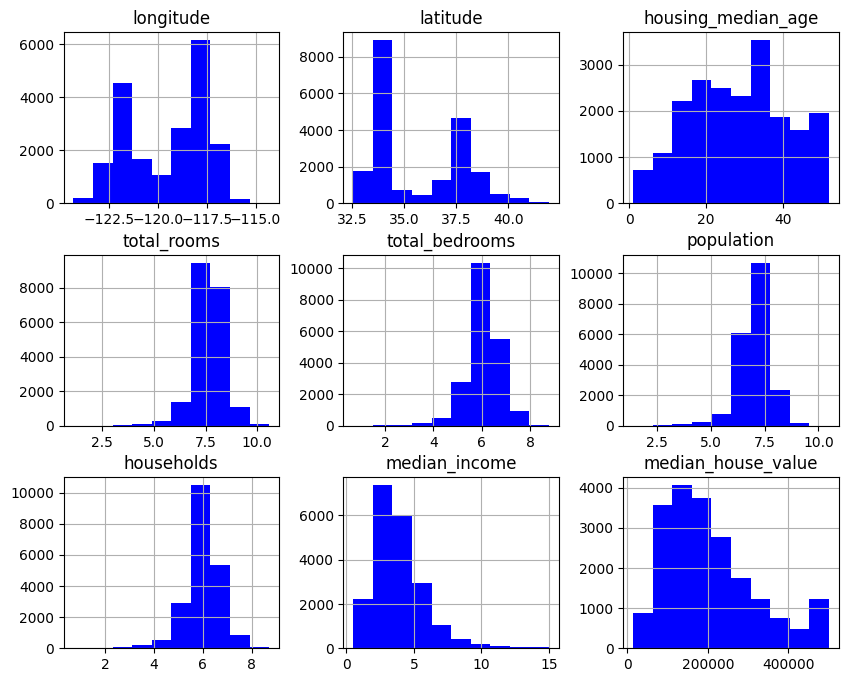

In [335]:
data.hist(figsize=(10, 8) , color = 'b')

C:\Users\ayoya\AppData\Local\Temp\ipykernel_18524\2723631991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

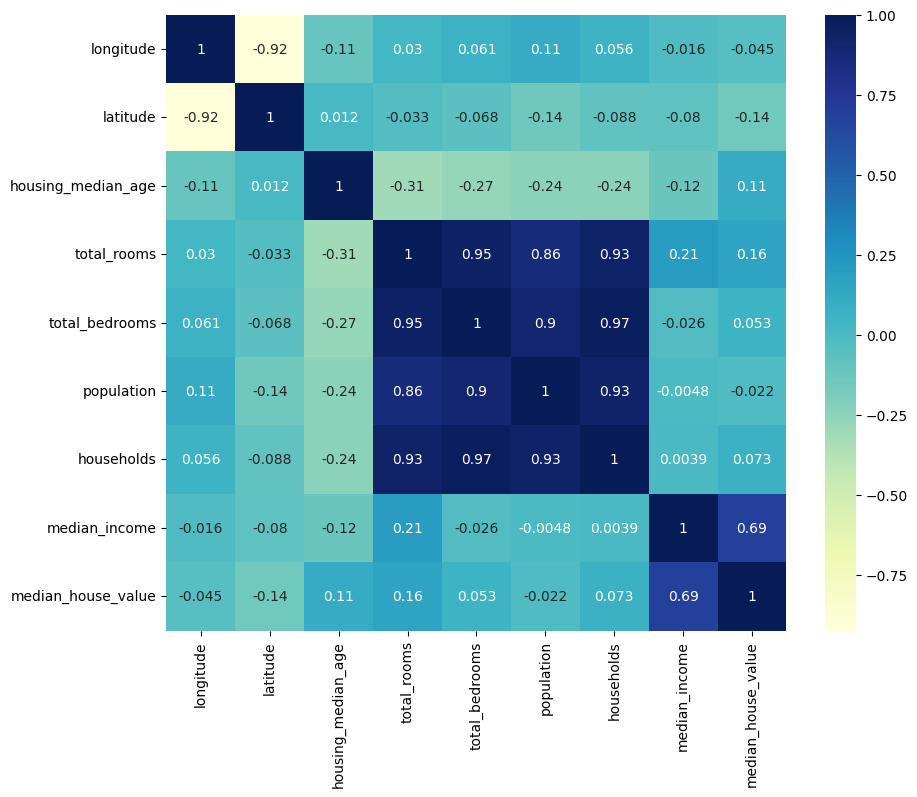

In [336]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

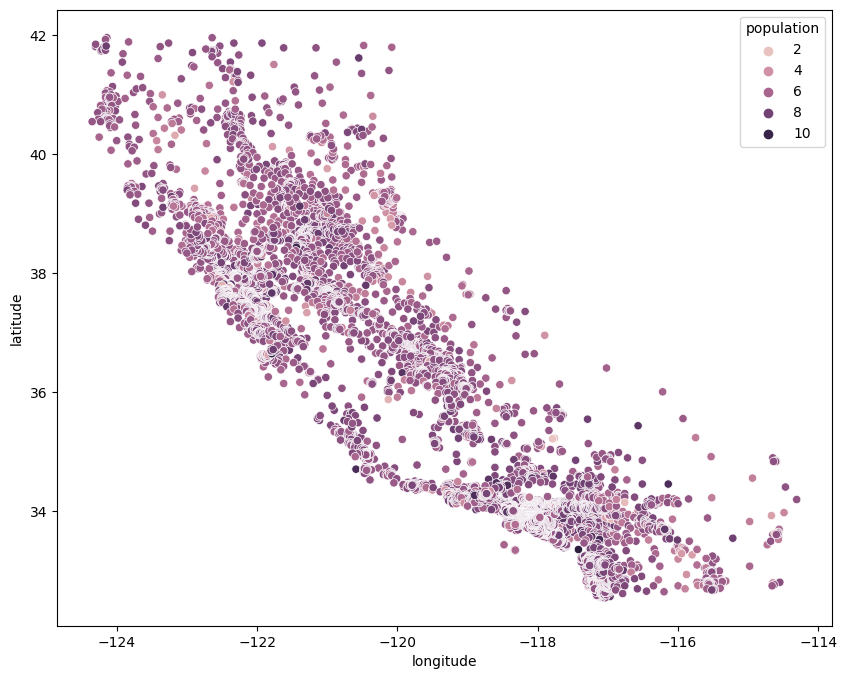

In [337]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = data , x = 'longitude' , y = 'latitude' , hue ='population')


<Axes: xlabel='longitude', ylabel='latitude'>

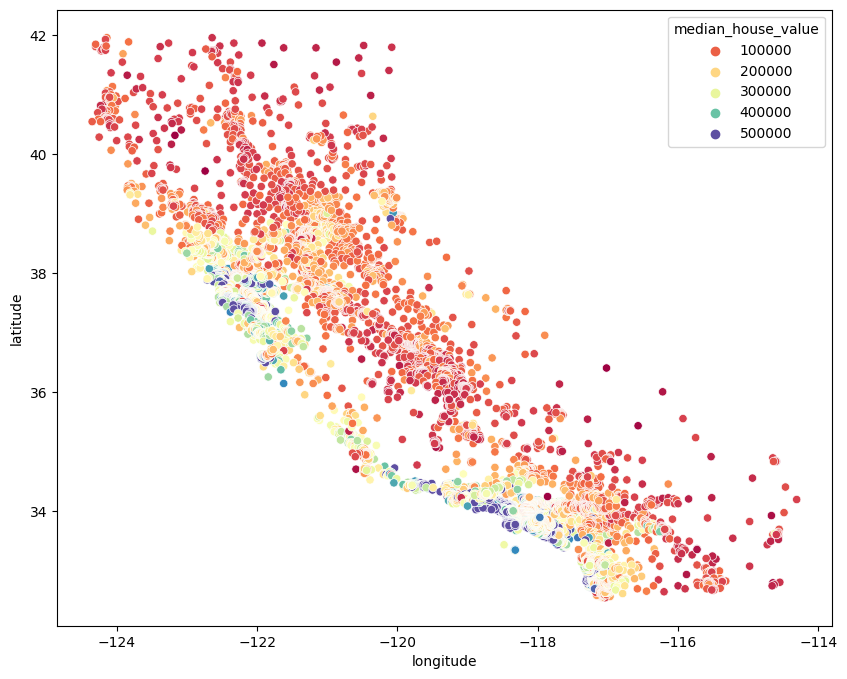

In [338]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = data , x = 'longitude' , y = 'latitude' , hue ='median_house_value' , palette ="Spectral")

In [339]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
y = data["median_house_value"]
data =data.drop(["median_house_value"  ] , axis=1)


In [340]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0


<Axes: >

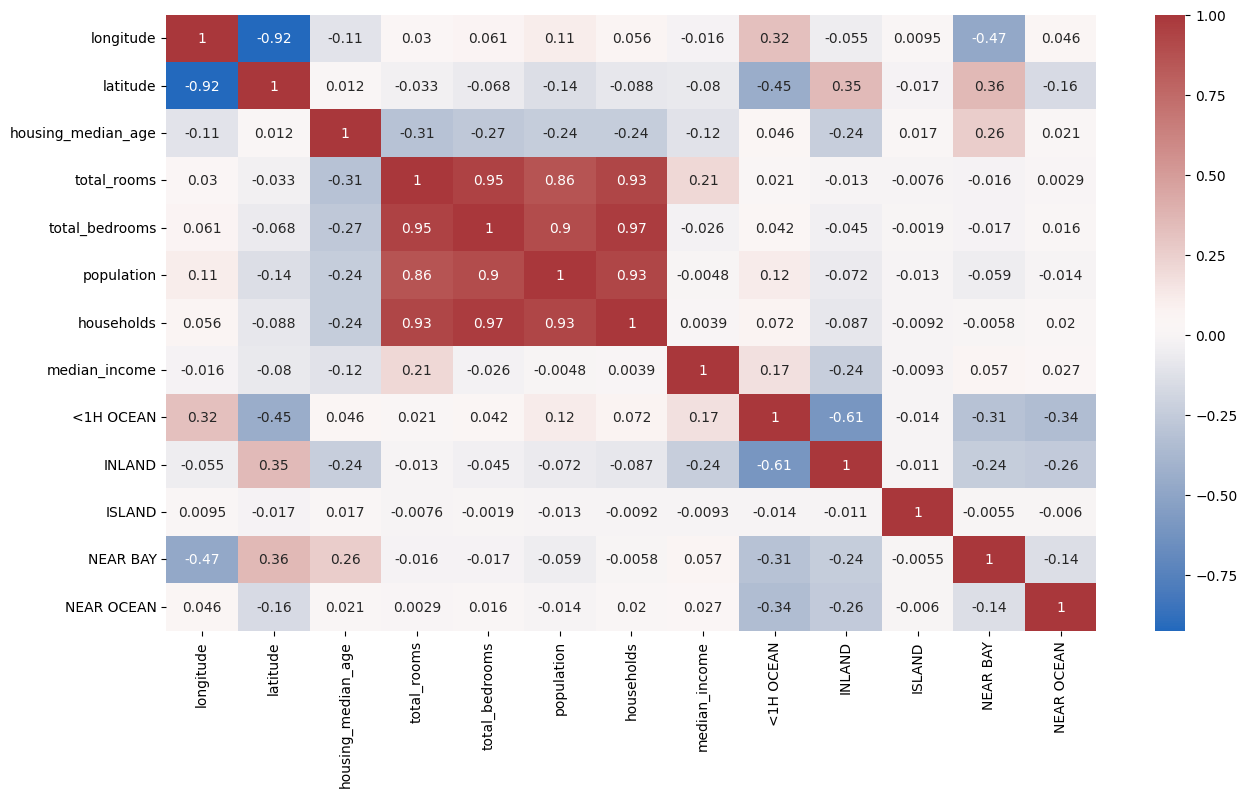

In [341]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap="vlag")

In [342]:
x_train , x_test , y_train , y_test=train_test_split(data , y , test_size = 0.2 )

In [343]:
x_train.shape
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 3675 to 9585
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   <1H OCEAN           16346 non-null  uint8  
 9   INLAND              16346 non-null  uint8  
 10  ISLAND              16346 non-null  uint8  
 11  NEAR BAY            16346 non-null  uint8  
 12  NEAR OCEAN          16346 non-null  uint8  
dtypes: float64(8), uint8(5)
memory usage: 1.2 MB


In [344]:
x_test.shape

(4087, 13)

In [345]:

forest = RandomForestRegressor()
forest.fit(x_train,y_train)
forest.score(x_test, y_test)

0.8262077246566633